##Preprocess

##Installing Library

In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import recall_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf

##Fethcing Data from Kaggle 

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           6759        208  1.0              
kaggleashwin/population-dataset                                World Population by Countries Dataset (1960-2021)    69KB  2022-08-31 05:30:26           1716         72  1.0              
iamsouravbanerjee/house-rent-prediction-dataset                House Rent Prediction Dataset                        82KB  2022-08-20 13:49:03          12584        317  1.0              
pantanjali/unemployment-dataset                                Un

In [8]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
!kaggle datasets download -d ssismasterchief/machine-hack-fake-news-content-detection # dataset API Command

  0% 0.00/560k [00:00<?, ?B/s]
100% 560k/560k [00:00<00:00, 81.3MB/s]


In [9]:
!unzip machine-hack-fake-news-content-detection.zip

Archive:  machine-hack-fake-news-content-detection.zip
  inflating: Test.csv                
  inflating: Train.csv               
  inflating: sample submission.csv   


##1.Read train.csv in pandas.

In [10]:
df = pd.read_csv("/content/Train.csv")
print(df.shape)

(10240, 3)


In [11]:
df

,Labels,Text,Text_Tag
0,1,Says the Annies List political group supports ...,abortion
1,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments"
2,3,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy
3,1,Health care reform legislation is likely to ma...,health-care
4,2,The economic turnaround started at the end of ...,"economy,jobs"
...,...,...,...
10235,3,There are a larger number of shark attacks in ...,"animals,elections"
10236,3,Democrats have now become the party of the [At...,elections
10237,2,Says an alternative to Social Security that op...,"retirement,social-security"
10238,1,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy"


##2.Calculate the distribution of labels.

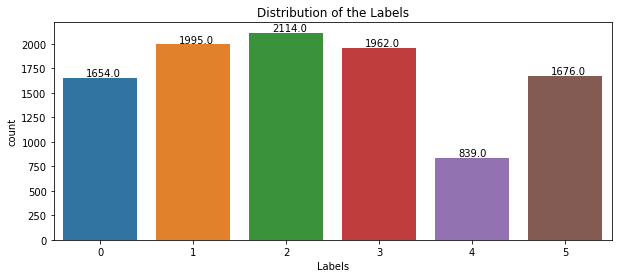

In [12]:
plt.figure(figsize = (10,4))
ax = sns.countplot(x="Labels", data=df)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+15))
plt.title("Distribution of the Labels")
plt.show()

##3.Normalize the text 

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [37]:
from nltk.corpus import stopwords
import string
from tqdm import tqdm
tqdm.pandas()

In [30]:
df['Original Text'] = df['Text']
print("Original text: ")

print(df['Text'][0])

Original text: 
says the annies list political group supports third-trimester abortions on demand.


In [31]:
df["Text"] = df["Text"].str.lower()

In [33]:
stopwords_ = set(stopwords.words('english'))

def stopwords_removal(text):
    return " ".join([word for word in str(text).split() if word not in stopwords_])

tqdm.pandas()
df['Text'] = df['Text'].progress_apply(lambda text: stopwords_removal(text))

100%|██████████| 10240/10240 [00:00<00:00, 92883.24it/s]


In [35]:
print("After removing stopwords: ")

print(df['Text'][0])

After removing stopwords: 
says annies list political group supports third-trimester abortions demand.


In [38]:
punctuations= list(string.punctuation)

def cleaning_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df['Text'] = df['Text'].progress_apply(lambda text: cleaning_punctuations(text))

100%|██████████| 10240/10240 [00:00<00:00, 182156.86it/s]


In [40]:
print("After removing punctuations: ")

print(df['Text'][0])

After removing punctuations: 
says annies list political group supports thirdtrimester abortions demand


##4.Generate the word cloud for label 1 (False news).

In [41]:
from wordcloud import WordCloud 

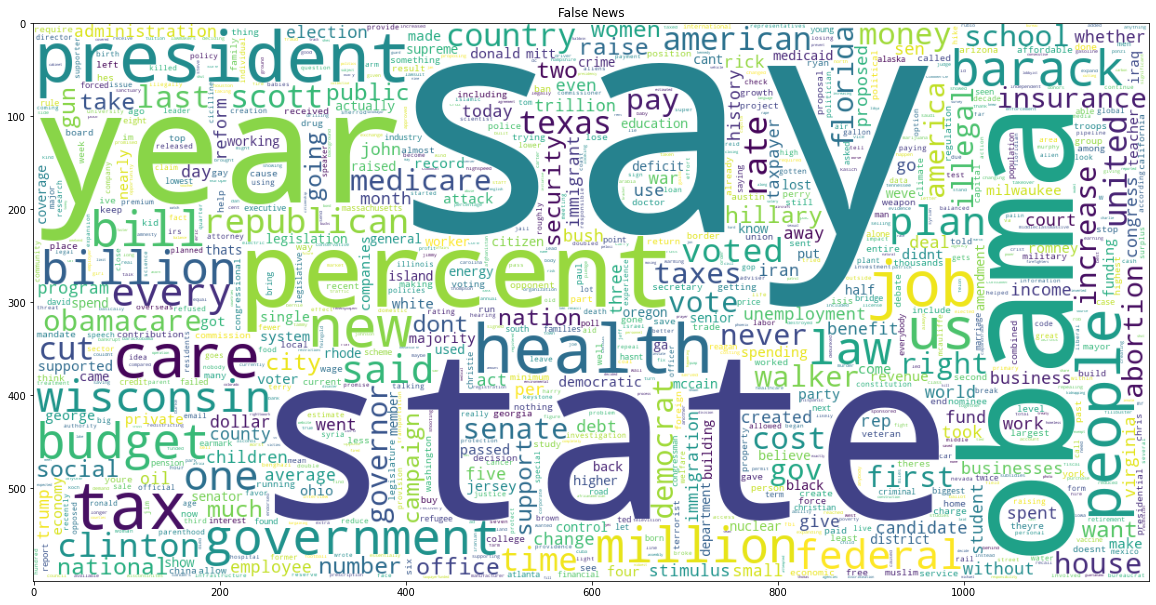

In [42]:
wc = WordCloud(background_color='white', max_words = 1000 , width = 1200 , height = 600, 
               collocations=False).generate(" ".join(df[df['Labels']==1]['Text']))
plt.figure(figsize = (20,20))
plt.title("False News")
plt.imshow(wc)

##5. Split the clean text and labels into a training and testing set with 80:20 ratio.

In [45]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [47]:
!pip install tensorflow-addons==0.8.3
!pip install tensorflow==2.2.0-rc3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 8.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.0-rc3 (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.0+zzzcolab20220506153740, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.4+zzzcolab20220516125453, 2.6.5, 2.6.5+zzzcolab20220523104206, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.0+zzzcolab20220506150900, 2.7.1, 2.7.2, 2.7.2+zzzcolab20220516114640, 2.7.3, 2.7.3+zzzcolab20220523111007, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.0+zzzcolab20220506162203, 2.8.1, 2.8.1+zzzcola

In [48]:
import tensorflow_addons as tfa

In [49]:
num_classes = (df['Labels'].nunique())

In [51]:
X = df['Text']
y = tf.keras.utils.to_categorical(df['Labels'], num_classes)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##6. Tokenize the clean text on the training set using Tensorflow library. Generate the tokens for training and testing sets. Print total tokens.

In [53]:
train_tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
train_tokenizer.fit_on_texts(X_train.values)
train_word_index = train_tokenizer.word_index
#print(train_word_index)

In [54]:
train_tokenizer

In [55]:
vocab_length = len(train_word_index) + 1
vocab_length

12002

In [56]:
train_sequences = train_tokenizer.texts_to_sequences(X_train)
len(train_sequences)

8192

In [57]:
test_sequences = train_tokenizer.texts_to_sequences(X_test)
len(test_sequences)

2048

In [58]:
maxlen=20
train_padded_seqeunces = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, padding='post', maxlen=maxlen, truncating='post')
test_padded_seqeunces = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, padding='post', maxlen=maxlen, truncating='post')

##9. Build the RNN to predict 6 possible labels with the help of Embeddings by setting the embedding dimension as 6.

In [59]:
embedding_dim = 6
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, input_length=maxlen),
    tf.keras.layers.SimpleRNN(64, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(32, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(16, activation='tanh'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=tfa.metrics.F1Score(num_classes=num_classes))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 6)             72012     
                                                                 
 simple_rnn (SimpleRNN)      (None, 20, 64)            4544      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20, 32)            3104      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 16)                784       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 6)                 1

In [60]:
history = model.fit(train_padded_seqeunces, y_train, epochs=20, validation_data=(test_padded_seqeunces, y_test))

Epoch 1/20
255/256 [============================>.] - ETA: 0s - loss: 1.7783 - f1_score: 0.1358

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2034: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


256/256 [==============================] - 8s 18ms/step - loss: 1.7783 - f1_score: 0.1358 - val_loss: 1.7553 - val_f1_score: 0.0867
Epoch 2/20
256/256 [==============================] - 5s 20ms/step - loss: 1.7505 - f1_score: 0.1733 - val_loss: 1.7582 - val_f1_score: 0.1383
Epoch 3/20
256/256 [==============================] - 4s 16ms/step - loss: 1.6807 - f1_score: 0.2455 - val_loss: 1.8024 - val_f1_score: 0.1543
Epoch 4/20
256/256 [==============================] - 4s 17ms/step - loss: 1.5061 - f1_score: 0.3666 - val_loss: 1.9491 - val_f1_score: 0.1821
Epoch 5/20
256/256 [==============================] - 6s 24ms/step - loss: 1.2557 - f1_score: 0.4987 - val_loss: 2.1639 - val_f1_score: 0.1783
Epoch 6/20
256/256 [==============================] - 6s 25ms/step - loss: 0.9987 - f1_score: 0.6253 - val_loss: 2.4871 - val_f1_score: 0.1764
Epoch 7/20
256/256 [==============================] - 5s 19ms/step - loss: 0.7878 - f1_score: 0.7198 - val_loss: 2.7638 - val_f1_score: 0.1856
Epoch 8/20

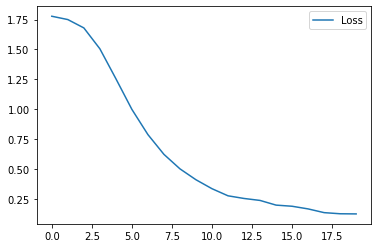

In [61]:
plt.plot(history.history['loss'], label='Loss')

plt.legend()
plt.show()

In [62]:
model.evaluate(test_padded_seqeunces, y_test)

64/64 [==============================] - 0s 5ms/step - loss: 5.6263 - f1_score: 0.1794


[5.626251697540283,
 array([0.15384614, 0.21662469, 0.21588092, 0.20905924, 0.11724138,
        0.16402878], dtype=float32)]

In [63]:
test_prob = model.predict(test_padded_seqeunces)
test_pred = np.where(test_prob > 0.5, 1, 0)

##10. Justify the total params of the designed network.
##11. Train the model with 20 epochs, specifying the testing set.
##12. Calculate the log loss, F1 score, and confusion matrix of the training and testing set.

In [64]:
from sklearn.metrics import f1_score, log_loss, multilabel_confusion_matrix, plot_confusion_matrix
print("Log-Loss =", log_loss(y_test, test_prob))

Log-Loss = 5.626251265483031


In [65]:
print("F1-Score =", f1_score(y_test, test_pred, average = 'weighted'))

F1-Score = 0.18731534321626758


In [66]:
labels = ['Barely-True', 'False', 'Half-True', 'Mostly-True', 'Not-Known', 'True']

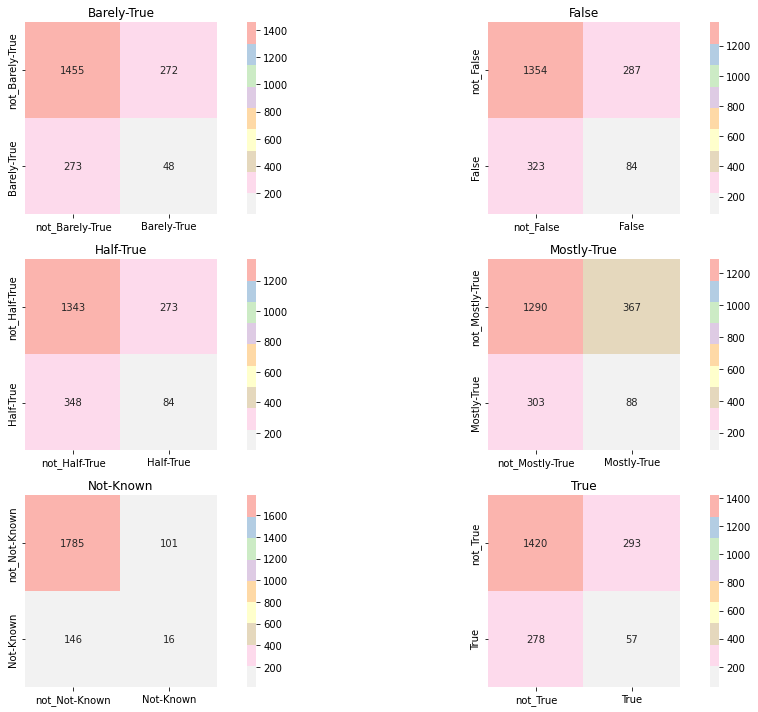

In [67]:

cm = multilabel_confusion_matrix(y_test, test_pred)
fig = plt.figure(figsize = (15, 10))
for i, (label, matrix) in enumerate(zip(labels, cm)):
    plt.subplot(3, 2, i+1)
    l = [f'not_{label}', label]
    sns.heatmap(matrix, annot = True, square = True, xticklabels = l, yticklabels = l, cmap='Pastel1_r', fmt='d')
    plt.title(label)
    
plt.tight_layout()
plt.show()